<a href="https://colab.research.google.com/github/thousandoaks/Intro-Causal-Inference/blob/main/code/Getting_started_with_DoWhy_A_simple_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install dowhy

     |████████████████████████████████| 123 kB 5.3 MB/s 
  Attempting uninstall: pydot
    Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0


In [3]:
import numpy as np
import pandas as pd

import dowhy
from dowhy import CausalModel
import dowhy.datasets

# Avoid printing dataconversion warnings from sklearn
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Config dict to set the logging level
import logging.config
DEFAULT_LOGGING = {
    'version': 1,
    'disable_existing_loggers': False,
    'loggers': {
        '': {
            'level': 'WARN',
        },
    }
}

logging.config.dictConfig(DEFAULT_LOGGING)

In [8]:
data = dowhy.datasets.linear_dataset(beta=10,
        num_common_causes=5,
        num_instruments = 2,
        num_effect_modifiers=1,
        num_samples=20000,
        treatment_is_binary=True,
        num_discrete_common_causes=1)
df = data["df"]
print(df.head())
print(data["dot_graph"])
print("\n")
print(data["gml_graph"])

         X0   Z0        Z1        W0  ...        W3  W4     v0          y
0 -1.432424  1.0  0.307553  1.261187  ...  0.928597   1   True  28.102847
1 -0.583339  0.0  0.117744 -1.391037  ... -1.389994   2  False  -5.879898
2 -1.038430  1.0  0.026121  0.727341  ... -0.559043   2   True  15.659111
3 -0.984499  1.0  0.674727  0.157743  ...  1.200592   1   True  16.970012
4 -0.665454  1.0  0.199176  0.968056  ... -2.091311   1   True   3.248001

[5 rows x 10 columns]
digraph { U[label="Unobserved Confounders"]; U->y;v0->y;U->v0;W0-> v0; W1-> v0; W2-> v0; W3-> v0; W4-> v0;Z0-> v0; Z1-> v0;W0-> y; W1-> y; W2-> y; W3-> y; W4-> y;X0-> y;}


graph[directed 1node[ id "y" label "y"]node[ id "Unobserved Confounders" label "Unobserved Confounders"]edge[source "Unobserved Confounders" target "y"]node[ id "W0" label "W0"] node[ id "W1" label "W1"] node[ id "W2" label "W2"] node[ id "W3" label "W3"] node[ id "W4" label "W4"]node[ id "Z0" label "Z0"] node[ id "Z1" label "Z1"]node[ id "v0" label "v0"]edg

In [9]:
df

,X0,Z0,Z1,W0,W1,W2,W3,W4,v0,y
0,-1.432424,1.0,0.307553,1.261187,2.569677,0.199363,0.928597,1,True,28.102847
1,-0.583339,0.0,0.117744,-1.391037,-0.673376,-0.795703,-1.389994,2,False,-5.879898
2,-1.038430,1.0,0.026121,0.727341,0.018212,-0.009081,-0.559043,2,True,15.659111
3,-0.984499,1.0,0.674727,0.157743,0.371972,-0.263513,1.200592,1,True,16.970012
4,-0.665454,1.0,0.199176,0.968056,-0.590365,-0.779294,-2.091311,1,True,3.248001
...,...,...,...,...,...,...,...,...,...,...
19995,-0.752127,1.0,0.812065,0.033728,-0.803308,-0.420052,-1.365087,2,True,6.830700
19996,0.122774,0.0,0.925043,0.373865,0.095294,-2.834141,-0.849587,0,True,2.783994
19997,-1.558765,1.0,0.846115,0.991086,0.702266,0.337282,-1.452529,2,True,14.544910
19998,1.534886,1.0,0.123870,1.152853,0.257575,0.853032,0.166835,3,True,37.816614


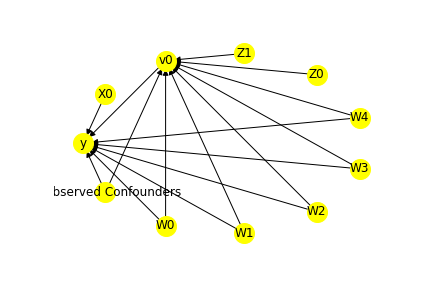

In [11]:
# With graph
model=CausalModel(
        data = df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        graph=data["gml_graph"]
        )




from IPython.display import Image, display
display(Image(filename="causal_model.png"))

# Identification

In [12]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                    
─────(Expectation(y|W1,X0,W4,W3,W0,W2))
d[v₀]                                  
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W1,X0,W4,W3,W0,W2,U) = P(y|v0,W1,X0,W4,W3,W0,W2)

### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, [Z1, Z0])*Derivative([v0], [Z1, Z0])**(-1))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z1,Z0})
Estimand assumption 2, Exclusion: If we remove {Z1,Z0}→{v0}, then ¬({Z1,Z0}→y)

### Estimand : 3
Estimand name: frontdoor
No such variable found!



# Estimation

In [13]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification")
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                    
─────(Expectation(y|W1,X0,W4,W3,W0,W2))
d[v₀]                                  
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W1,X0,W4,W3,W0,W2,U) = P(y|v0,W1,X0,W4,W3,W0,W2)

## Realized estimand
b: y~v0+W1+X0+W4+W3+W0+W2
Target units: ate

## Estimate
Mean value: 11.855122237162448

Causal Estimate is 11.855122237162448


# Refuting the estimate

In [15]:
res_random=model.refute_estimate(identified_estimand, causal_estimate, method_name="random_common_cause")
print(res_random)

Refute: Add a Random Common Cause
Estimated effect:11.855122237162448
New effect:11.937094543754435



In [16]:
res_unobserved=model.refute_estimate(identified_estimand, causal_estimate, method_name="add_unobserved_common_cause",
                                     confounders_effect_on_treatment="binary_flip", confounders_effect_on_outcome="linear",
                                    effect_strength_on_treatment=0.01, effect_strength_on_outcome=0.02)
print(res_unobserved)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Refute: Add an Unobserved Common Cause
Estimated effect:11.855122237162448
New effect:10.05361058054404



In [17]:
res_placebo=model.refute_estimate(identified_estimand, causal_estimate,
        method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

Refute: Use a Placebo Treatment
Estimated effect:11.855122237162448
New effect:-0.012962086515096123
p value:0.42000000000000004



In [18]:
res_subset=model.refute_estimate(identified_estimand, causal_estimate,
        method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

Refute: Use a subset of data
Estimated effect:11.855122237162448
New effect:11.927428986805392
p value:0.2

